In [53]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')


In [54]:
#load dataset
df_main = pd.read_csv('/content/sample_data/CAR DETAILS FROM CAR DEKHO.csv')

In [55]:
df_main.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [56]:
df_main.shape

(4340, 8)

In [57]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [58]:
#numerical stats
df_main.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [59]:
#missing values
df_main.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [60]:
df_main['Age'] = 2020 - df_main['year']
df_main.drop('year',axis=1,inplace = True)

In [61]:
df_main.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'Past_Owners'},inplace = True)

In [62]:
df_main.columns

Index(['name', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'Age'],
      dtype='object')

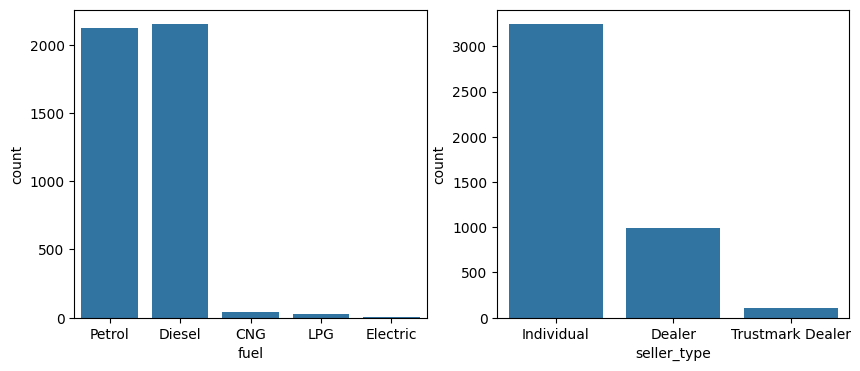

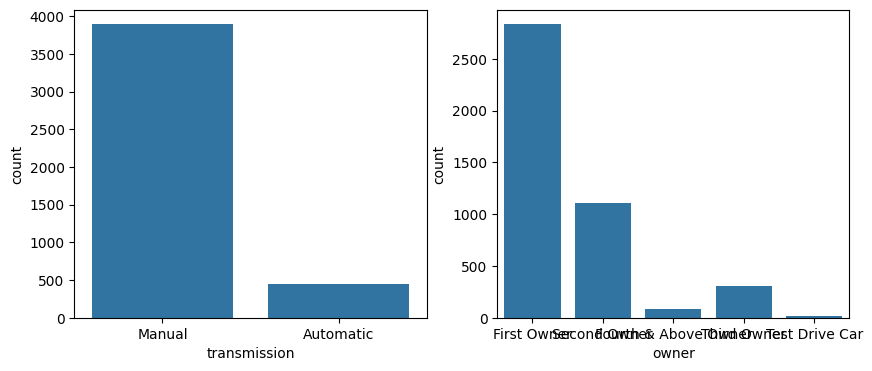

In [63]:
cat_cols = ['fuel','seller_type','transmission','owner']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)

    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df_main)
    i += 1

    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df_main)
    i += 1

    plt.show()

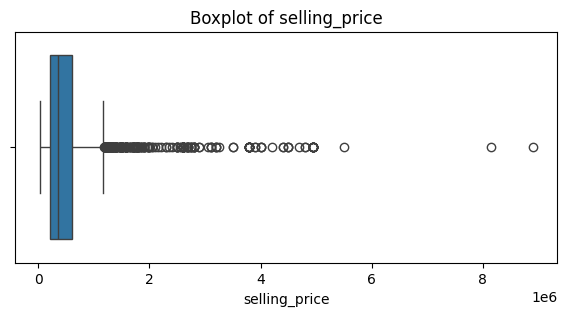

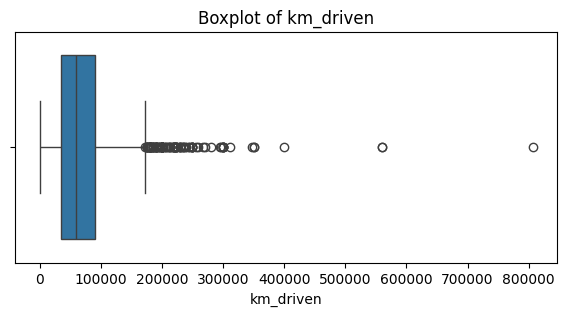

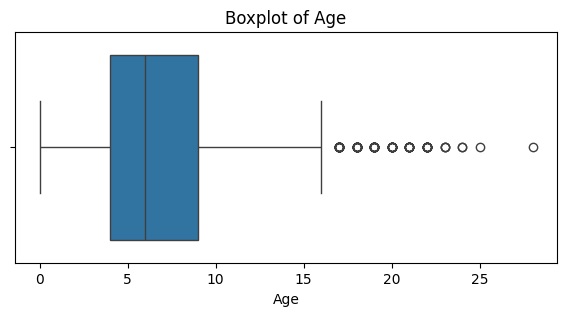

In [64]:
num_cols = ['selling_price','km_driven','Age'] # Corrected column names

for col in num_cols:
    plt.figure(figsize=[7,3]) # Create a figure for each plot
    sns.boxplot(x=col, data=df_main)
    plt.title(f'Boxplot of {col}') # Add a title for clarity
    plt.show()

In [65]:
df_main[df_main['selling_price'] > df_main['selling_price'].quantile(0.99)]

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
89,Mercedes-Benz S-Class S 350d Connoisseurs Edition,8150000,6500,Diesel,Dealer,Automatic,First Owner,3
101,Mercedes-Benz E-Class Exclusive E 200 BSIV,4500000,9800,Petrol,Dealer,Automatic,First Owner,2
539,Mercedes-Benz GL-Class 350 CDI Blue Efficiency,4400000,100000,Diesel,Individual,Automatic,Second Owner,6
553,Mercedes-Benz C-Class Progressive C 220d,3800000,10000,Diesel,Dealer,Automatic,First Owner,2
555,BMW X5 xDrive 30d xLine,4950000,30000,Diesel,Dealer,Automatic,First Owner,1
572,Mercedes-Benz C-Class Progressive C 220d,3800000,10000,Diesel,Dealer,Automatic,First Owner,2
574,BMW X5 xDrive 30d xLine,4950000,30000,Diesel,Dealer,Automatic,First Owner,1
591,Mercedes-Benz C-Class Progressive C 220d,3800000,10000,Diesel,Dealer,Automatic,First Owner,2
593,BMW X5 xDrive 30d xLine,4950000,30000,Diesel,Dealer,Automatic,First Owner,1
610,Mercedes-Benz C-Class Progressive C 220d,3800000,10000,Diesel,Dealer,Automatic,First Owner,2


In [66]:
df_main[df_main['selling_price'] > df_main['selling_price'].quantile(0.99)]

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
89,Mercedes-Benz S-Class S 350d Connoisseurs Edition,8150000,6500,Diesel,Dealer,Automatic,First Owner,3
101,Mercedes-Benz E-Class Exclusive E 200 BSIV,4500000,9800,Petrol,Dealer,Automatic,First Owner,2
539,Mercedes-Benz GL-Class 350 CDI Blue Efficiency,4400000,100000,Diesel,Individual,Automatic,Second Owner,6
553,Mercedes-Benz C-Class Progressive C 220d,3800000,10000,Diesel,Dealer,Automatic,First Owner,2
555,BMW X5 xDrive 30d xLine,4950000,30000,Diesel,Dealer,Automatic,First Owner,1
572,Mercedes-Benz C-Class Progressive C 220d,3800000,10000,Diesel,Dealer,Automatic,First Owner,2
574,BMW X5 xDrive 30d xLine,4950000,30000,Diesel,Dealer,Automatic,First Owner,1
591,Mercedes-Benz C-Class Progressive C 220d,3800000,10000,Diesel,Dealer,Automatic,First Owner,2
593,BMW X5 xDrive 30d xLine,4950000,30000,Diesel,Dealer,Automatic,First Owner,1
610,Mercedes-Benz C-Class Progressive C 220d,3800000,10000,Diesel,Dealer,Automatic,First Owner,2


In [67]:
df_main[df_main['km_driven'] > df_main['km_driven'].quantile(0.99)]

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
69,Chevrolet Tavera Neo LS B3 - 7(C) seats BSIII,280000,350000,Diesel,Individual,Manual,Second Owner,10
70,Toyota Corolla Altis Diesel D4DG,350000,230000,Diesel,Individual,Manual,First Owner,9
197,Mahindra Xylo E4,229999,230000,Diesel,Individual,Manual,Third Owner,11
525,Maruti SX4 S Cross DDiS 320 Delta,665000,560000,Diesel,Dealer,Manual,First Owner,4
1101,Tata Indica DLS,85000,300000,Diesel,Individual,Manual,Second Owner,14
1116,Toyota Innova 2.5 V Diesel 7-seater,200000,223000,Diesel,Individual,Manual,First Owner,15
1243,Maruti Swift VXI BSIII,250000,806599,Petrol,Dealer,Manual,First Owner,11
1253,Toyota Corolla Altis D-4D J,715000,234000,Diesel,Individual,Manual,First Owner,6
1414,Skoda Superb Elegance 2.0 TDI CR AT,450000,235000,Diesel,Individual,Automatic,First Owner,9
1426,Mahindra Scorpio VLX AT 2WD BSIII,225000,223660,Diesel,Individual,Automatic,Third Owner,16


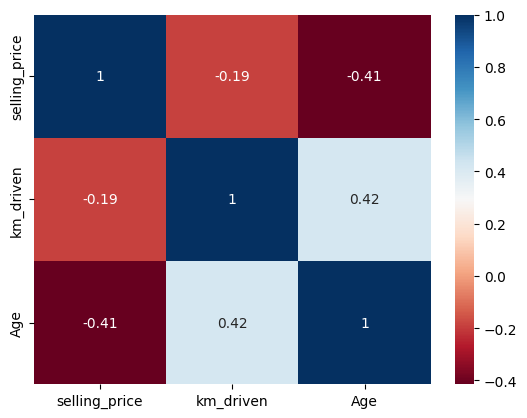

In [68]:
sns.heatmap(df_main.select_dtypes(include=np.number).corr(), annot=True, cmap="RdBu")
plt.show()

In [69]:
df_main.select_dtypes(include=np.number).corr()['selling_price']

,selling_price
selling_price,1.000000
km_driven,-0.192289
Age,-0.413922


In [70]:
df_main.pivot_table(values='selling_price', index = 'seller_type', columns= 'fuel')

fuel,CNG,Diesel,Electric,LPG,Petrol
seller_type,,,,,
Dealer,311444.333333,9.423081e+05,310000.0,240000.000000,475017.552863
Individual,267225.741935,5.616871e+05,NaN,164545.409091,297196.682972
Trustmark Dealer,NaN,1.184583e+06,NaN,NaN,675277.777778


In [71]:
df_main.pivot_table(values='selling_price', index = 'seller_type', columns= 'transmission')

transmission,Automatic,Manual
seller_type,,
Dealer,1.571880e+06,484419.508366
Individual,1.191722e+06,370861.010224
Trustmark Dealer,1.953158e+06,677289.156627


In [72]:
df_main.drop(labels='name',axis= 1, inplace = True)

In [73]:
df_main.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
0,60000,70000,Petrol,Individual,Manual,First Owner,13
1,135000,50000,Petrol,Individual,Manual,First Owner,13
2,600000,100000,Diesel,Individual,Manual,First Owner,8
3,250000,46000,Petrol,Individual,Manual,First Owner,3
4,450000,141000,Diesel,Individual,Manual,Second Owner,6


In [74]:
df_main = pd.get_dummies(data = df_main,drop_first=True)

In [75]:
df_main.head()

,selling_price,km_driven,Age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,13,False,False,False,True,True,False,True,False,False,False,False
1,135000,50000,13,False,False,False,True,True,False,True,False,False,False,False
2,600000,100000,8,True,False,False,False,True,False,True,False,False,False,False
3,250000,46000,3,False,False,False,True,True,False,True,False,False,False,False
4,450000,141000,6,True,False,False,False,True,False,True,False,True,False,False


In [76]:
# Separating target variable and its features
y = df_main['selling_price']
X = df_main.drop('selling_price',axis=1)

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (3472, 13)
x test:  (868, 13)
y train:  (3472,)
y test:  (868,)


In [79]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [80]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)

    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))

    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))

    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))

    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))

    # Plotting Graphs
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')

    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')

    plt.show()

Train R2-score : 0.45
Test R2-score : 0.5
Train CV scores : [0.42960817 0.48108577 0.38382841 0.43316624 0.52284773]
Train CV mean : 0.45


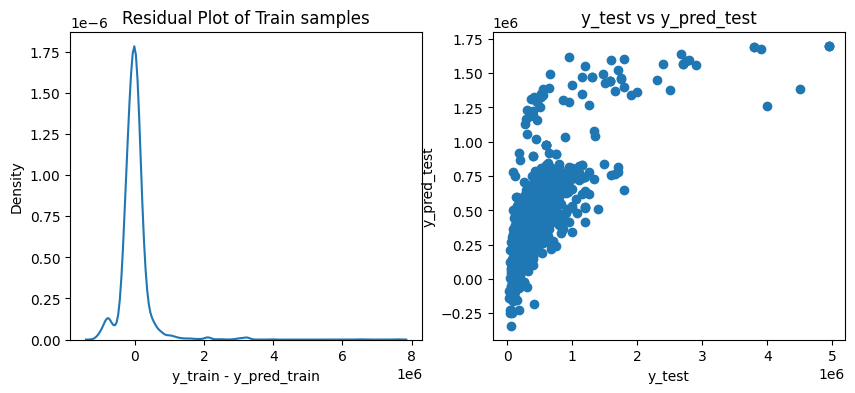

In [81]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

Train R2-score : 0.45
Test R2-score : 0.5
Train CV scores : [0.4264486  0.48248414 0.38316817 0.43600368 0.52231959]
Train CV mean : 0.45


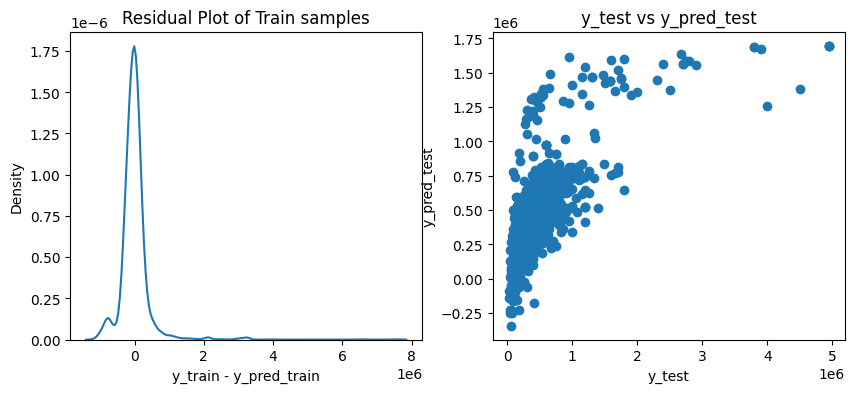

In [82]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

In [83]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

Train R2-score : 0.45
Test R2-score : 0.5
Train CV scores : [0.42960681 0.48109771 0.38372852 0.43319106 0.52198926]
Train CV mean : 0.45


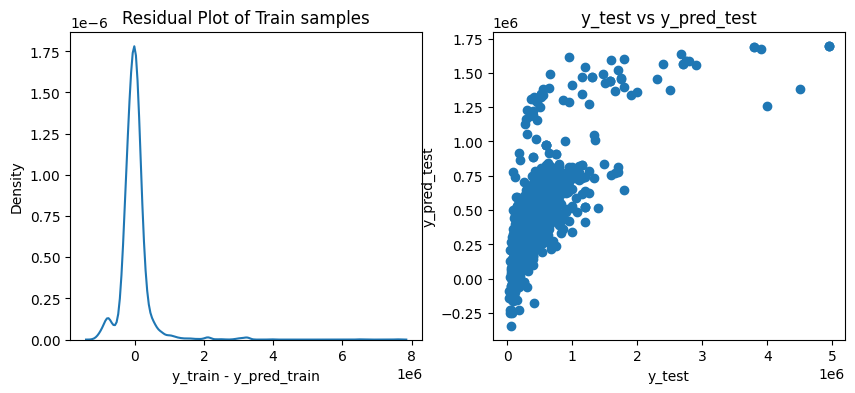

In [84]:
car_pred_model(ls_rs,"lasso.pkl")

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

In [90]:
import joblib
import os

def car_pred_model(model, filename):
    # Save file in the current working directory (Colab = /content/)
    save_path = os.path.join("/content", filename)

    joblib.dump(model, save_path)

    print("✅ Model saved successfully!")
    print("📁 Saved at:", save_path)



In [91]:
car_pred_model(rf_rs, "random_forest.pkl")

✅ Model saved successfully!
📁 Saved at: /content/random_forest.pkl


In [92]:
!ls /content

random_forest.pkl  sample_data


In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import joblib

df = pd.read_csv('/content/sample_data/CAR DETAILS FROM CAR DEKHO.csv')

# Feature engineering
df['Age'] = 2024 - df['year']
df.drop(['year','name'], axis=1, inplace=True)

# One-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Split
y = df['selling_price']
X = df.drop('selling_price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model + training
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# SAVE trained model
joblib.dump(rf, "random_forest.pkl")

# SAVE feature columns
joblib.dump(list(X.columns), "columns.pkl")

print("Model and columns saved!")


Model and columns saved!


In [95]:
from google.colab import files
files.download("random_forest.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [96]:
from google.colab import files
files.download("columns.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

In [ ]:
car_pred_model(gb_rs,"gradient_boosting.pkl")

In [ ]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)